<a href="https://colab.research.google.com/github/dernameistegal/airbnb_price/blob/main/data_utils/data_preparation/listings_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path= ("/content/drive/MyDrive/Colab/airbnb/data/translations/translated_listings.pickle")
listings = pd.read_pickle(path)

In [ ]:
# transform price
listings["price"] = (
    listings["price"].str.replace("$", "").str.replace(",", "").astype(float)
)

In [ ]:
#remove zeros
print(len(listings[listings["price"] == 0]))
listings = listings[listings["price"] != 0]

5


In [ ]:
# log price
listings["log_price"] = np.log(listings["price"])

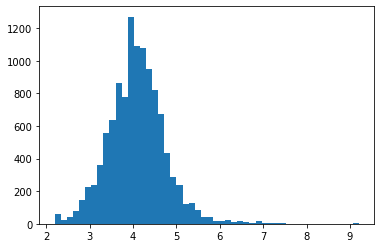

In [ ]:
import matplotlib.pyplot as plt
plt.hist(listings["log_price"], bins=50)
plt.show()

In [ ]:
# recode variables
rooms = pd.get_dummies(listings["room_type"], prefix="room")
listings = listings.drop("room_type", axis=1)
listings["host_is_superhost"] = listings["host_is_superhost"].map(dict(t=1, f=0))
listings["host_identity_verified"] = listings["host_identity_verified"].map(
    dict(t=1, f=0)
)
listings = pd.concat([listings, rooms], axis=1)
listings

In [ ]:
path = ("/content/drive/MyDrive/Colab/airbnb/data/translations/listings_workfile.pickle")
listings.to_pickle(path)

In [138]:
# remove columns from listings

listings = pd.read_pickle("/content/drive/MyDrive/Colab/airbnb/data/data1/listings_workfile.pickle")

lol = ["name", "listing_url", "scrape_id", "last_scraped", "picture_url", 
       "neighborhood_overview", "description", "host_id", 
       "host_url", "host_name", "host_location", "host_about",
       "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "host_total_listings_count",
       "host_has_profile_pic", "neighbourhood", "neighbourhood_group_cleansed", "bathrooms",
       "maximum_nights", "maximum_nights",	"minimum_minimum_nights", 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',"has_availability", "calendar_last_scraped",
       "number_of_reviews_ltm", "number_of_reviews_l30d", "license"]

listings_preliminary = listings.drop(lol, axis=1)

In [139]:
!pip install ast
import ast

listings_preliminary["host_verifications"] = listings_preliminary["host_verifications"].apply(ast.literal_eval)

  Using cached AST-0.0.2.tar.gz (19 kB)
  Using cached AST-0.0.1.tar.gz (19 kB)
ERROR: Could not find a version that satisfies the requirement ast (from versions: 0.0.1, 0.0.2)
ERROR: No matching distribution found for ast


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
listings_preliminary = listings_preliminary.join(pd.DataFrame(mlb.fit_transform(listings_preliminary.pop("host_verifications")),
                          columns=mlb.classes_,
                          index=listings_preliminary.index))

In [145]:
s = listings_preliminary["host_verifications"]

In [147]:
len(s)

11404

In [150]:
np.sum(listings_preliminary["host_verifications"].isna())

22

In [146]:
pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie
5339,1,0,0,1,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0
9593,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9592,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9591,0,0,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0
9590,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3189,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
5988,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5994,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
listings_preliminary["host_verifications"][150:200]